In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_dir = "E:\\Machine Learning\\flowers-recognition\\flowers"

In [3]:
train_dir = data_dir + "\\train"
test_dir = data_dir + "\\test"

In [4]:
for folder in os.listdir(train_dir):
    print(folder)

daisy
dandelion
rose
sunflower
tulip


In [5]:
from matplotlib.image import imread

In [6]:
rand_daisy = os.listdir(train_dir+"\\daisy")[random.randint(0,509)] 

In [7]:
rand_daisy

'34485028892_fc238ddfc8_n.jpg'

In [8]:
rand_daisy = plt.imread(train_dir+"\\daisy\\"+rand_daisy)

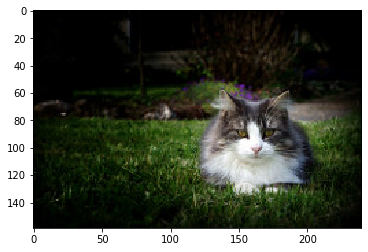

In [9]:
plt.imshow(rand_daisy)

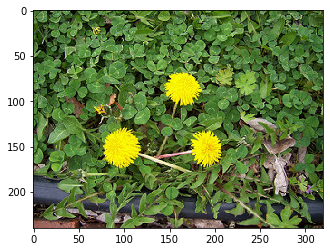

In [10]:
rand_dandelion = os.listdir(train_dir+"\\dandelion")[random.randint(0,509)]
rand_dandelion = plt.imread(train_dir+"\\dandelion\\"+rand_dandelion)
plt.imshow(rand_dandelion)

In [11]:
print(rand_daisy.shape)
print(rand_dandelion.shape)

(159, 240, 3)
(240, 320, 3)


In [12]:
dim1 = []
dim2 = []

for species in os.listdir(train_dir):
    for image_file in os.listdir(train_dir+"\\"+species):
        img = plt.imread(train_dir+"\\"+species+"\\"+image_file)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

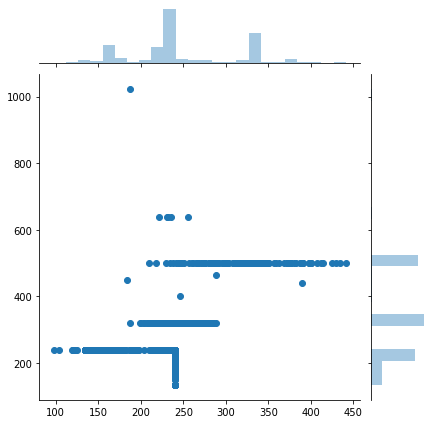

In [13]:
sns.jointplot(dim1,dim2)

In [14]:
np.mean(dim1)

249.25868342705922

In [15]:
np.mean(dim2)

330.9381409196163

In [16]:
image_shape = (250,330,3)

In [17]:
image_gen = ImageDataGenerator(rotation_range = 20,                         
                              width_shift_range=0.1,    
                              height_shift_range=0.1,
                               rescale=1/255,
                              shear_range= 0.1,             
                              zoom_range=0.1,              
                              horizontal_flip=True,        
                               fill_mode = 'nearest')       

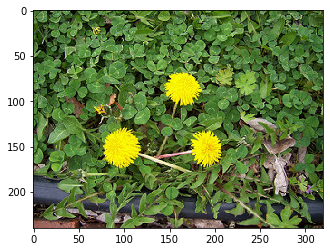

In [18]:
plt.imshow(rand_dandelion)

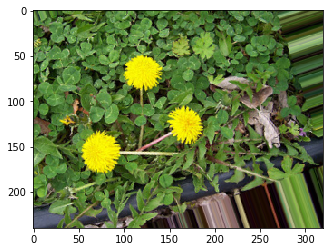

In [19]:
plt.imshow(image_gen.random_transform(rand_dandelion))

In [20]:
image_gen.flow_from_directory(train_dir)

Found 3023 images belonging to 5 classes.


In [21]:
image_gen.flow_from_directory(test_dir)

Found 1300 images belonging to 5 classes.


In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5, activation = "softmax"))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 330, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 165, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 165, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 82, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 82, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 41, 16)        4

In [25]:
batch_size = 16

In [26]:
train_image_gen = image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3023 images belonging to 5 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(test_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle=False)

Found 1300 images belonging to 5 classes.


In [28]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [29]:
stop = EarlyStopping(patience = 10, monitor = 'val_loss')

In [31]:
results = model.fit_generator(train_image_gen,
                             epochs=100,
                             validation_data=test_image_gen)

Epoch 1/19
189/189 [==============================] - 71s 377ms/step - loss: 0.5811 - accuracy: 0.7807 - val_loss: 0.7875 - val_accuracy: 0.7100
Epoch 2/19
189/189 [==============================] - 76s 400ms/step - loss: 0.5195 - accuracy: 0.8124 - val_loss: 0.8032 - val_accuracy: 0.7354
Epoch 3/19
189/189 [==============================] - 75s 399ms/step - loss: 0.5232 - accuracy: 0.7929 - val_loss: 0.8032 - val_accuracy: 0.7223
Epoch 4/19
189/189 [==============================] - 77s 409ms/step - loss: 0.5152 - accuracy: 0.8058 - val_loss: 0.7879 - val_accuracy: 0.7331
Epoch 5/19
189/189 [==============================] - 78s 410ms/step - loss: 0.4789 - accuracy: 0.8105 - val_loss: 0.7658 - val_accuracy: 0.7323
Epoch 6/19
189/189 [==============================] - 81s 428ms/step - loss: 0.4955 - accuracy: 0.8151 - val_loss: 0.8279 - val_accuracy: 0.7262
Epoch 7/19
189/189 [==============================] - 87s 459ms/step - loss: 0.4630 - accuracy: 0.8247 - val_loss: 0.9290 - val_ac